# Valuation Recap 2/5/2018

# Overview

1. Big Picture / Framework
2. Market Value Modeling
    1. Types of Models
    2. Stacking/Esemble Models
    3. Suggested Future Plans
3. Appraisal Risk Modeling and Putting it together
4. Data Collection
    1. Current Data cllection
    2. Suggested Future Plans / Data Products
5. Risk Modeling

# Big Picture / Framework

1. What drives home value?
2. How do we think about appraisal risk?


# Market Value Models (AVMs)

1. Types of Models
    1. Hedonic Models
    2. Repeat Sales Models
2. Stacking / Ensemble Models (Meta Models)

# Hedonic Models

1. Sales price is regressed on a set of variables that describe the unit
    1. Number of beds/baths, square footage, lot size, interior features, etc…
2. The “comps” approach
3. Regression coefficients can be interpreted as implicit attribute prices
4. Can be used on a single time period or can be run on a large pool of data with a time dummy

In [1]:
#Import relevant libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import sklearn as sk
import sklearn.model_selection as ms
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from django.core.wsgi import get_wsgi_application
from matplotlib import pyplot as plt
import sys
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/scripts/')
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/')
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/hedonic_model/ml/utils/')
import load_properties as lp
import load_soldproperties as lsp
lp.setup_environment()
%matplotlib inline
import mplleaflet
import ast
import data_utils
import data_utils as du
from scipy.stats import norm, skew 
#Create df of SoldProperties
from hedonic_model.models import SoldProperty
#Data included: Built after 1900; at least 1BR and 1BATH; 
#Px btw 50k-2mm
from hedonic_model.models import ListProperty
from django_pandas.io import read_frame
import mplleaflet
from IPython.display import Image
pd.options.display.float_format = '{:.2f}'.format
qs = SoldProperty.objects.all()
df = read_frame(qs)
#Create test set and training set
df_train, df_test = ms.train_test_split(df,test_size=0.2)
print('size of training set: {} homes'.format(len(df_train)))
print('size of test set: {} homes'.format(len(df_test)))

drop_cols = ['red_bell_ar_bpo','red_bell_bpo','certified_max_bid',
 'local_school_quality',
'certified_max_bid_created_at',
'house_canary_avm',
'red_bell_ave',
'is_foreclosure','img_path_header','img_paths_gallery','remax_url']
df_train = df_train.drop(drop_cols,axis=1)
df_test = df_test.drop(drop_cols,axis=1)
#Analyzing the Response/Target Variable: Sold Price

import properties...
size of training set: 1232 homes
size of test set: 308 homes


<b> Price Sold Data (Charlotte) </b>
(use https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python kernel)

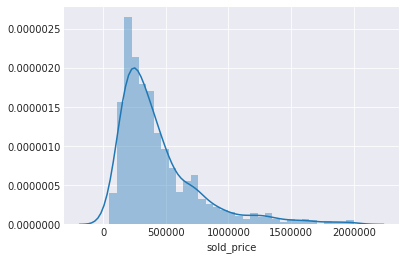

In [2]:
sns.distplot(df_train['sold_price'])

<b> We have learned that: </b>
* Sale price is not normally distributed
* Sale price has positive skewness (long right tail)
* Shows peakedness (distribution concentrated heavily in middle;
  skinny tails)

<b> Some features that drive Home Value </b>

1. House Size
2. Num Beds/Baths
3. Year Built
4. Year and Month Sold
5. Neighborhoods (School / Crime / Dist to Economic Center) (FEATURE TO ADD)
6. Days on market / Liquidity / Inventory (FEATURE TO ADD)
6. Interior Features (FEATURE TO ADD)

<b> House Size </b>

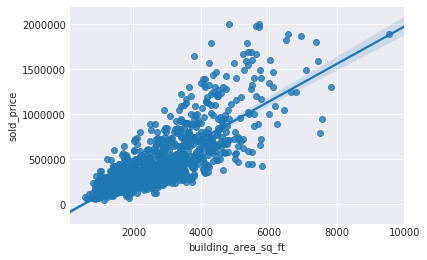

In [3]:
var = 'building_area_sq_ft'
ax = sns.regplot(x=var,y='sold_price',data=df_train)


<b> </b>

<b> Beds & Baths (No. of rooms) </b>

Text(0.5,1,'charlotte: price distribution per num bedrooms')

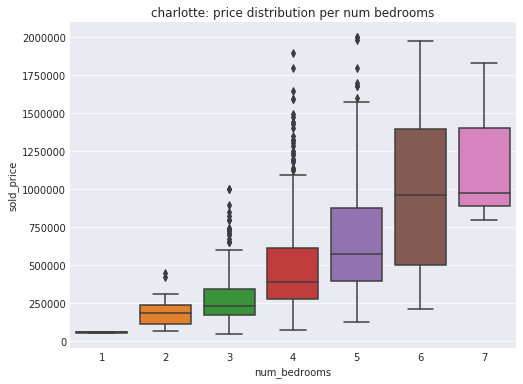

In [4]:
var = 'num_bedrooms'
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='sold_price',data=df_train)
ax.set_title('charlotte: price distribution per num bedrooms')

<b> Year Built </b>

Text(0.5,1,'price sold vs year built')

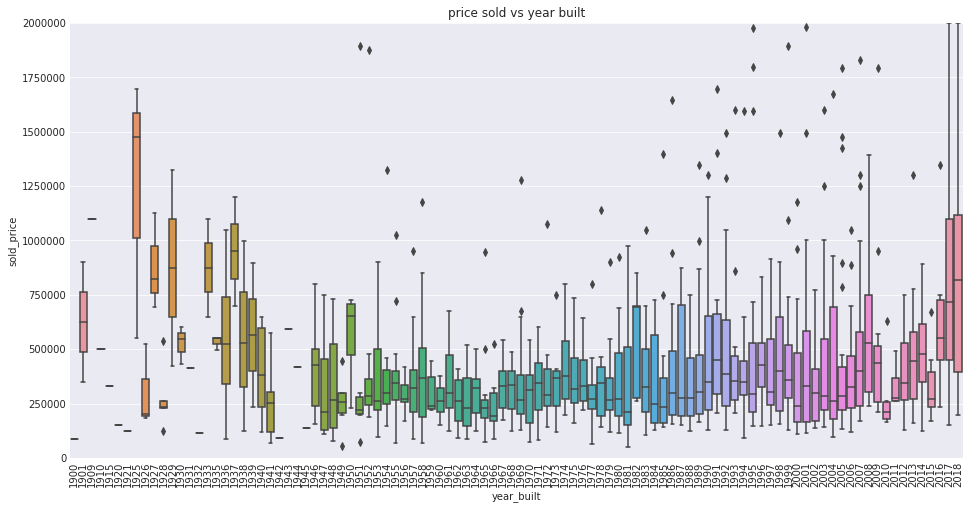

In [5]:
var = 'year_built'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="sold_price", data=df_train)
fig.axis(ymin=0, ymax=2000000)
plt.xticks(rotation=90)
ax.set_title('price sold vs year built')

In [6]:
df_train['date_sold'] = df_train['sale_price_history'].apply(du.history_to_sold_date)
df_test['date_sold'] = df_test['sale_price_history'].apply(du.history_to_sold_date)
df_train['year_sold'] = df_train['date_sold'].apply(lambda x: x.year)
df_train['month_sold'] = df_train['date_sold'].apply(lambda x: x.month)
df_test['year_sold'] = df_test['date_sold'].apply(lambda x: x.year)
df_test['month_sold'] = df_test['date_sold'].apply(lambda x: x.month)

<b> Month and Year Sold </b>

Text(0.5,1,'price sold vs month sold ')

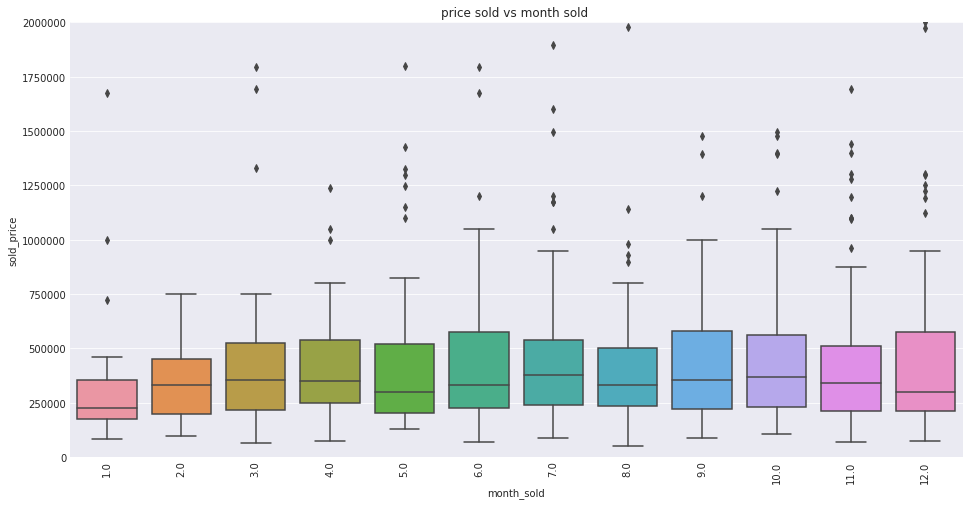

In [7]:
var = 'month_sold'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="sold_price", data=df_train)
fig.axis(ymin=0, ymax=2000000)
plt.xticks(rotation=90)
ax.set_title('price sold vs month sold ')

<b> Neighborhoods </b>
1. Currently using zipcodes
2.  Zipcodes are not sufficient - SOLUTION:
    1. Schooling and Crime data
    2. Unsupervised learning (clustering)
    3. Domain knowledge (Praveen / Jeremiah)

<b> Zip Codes </b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

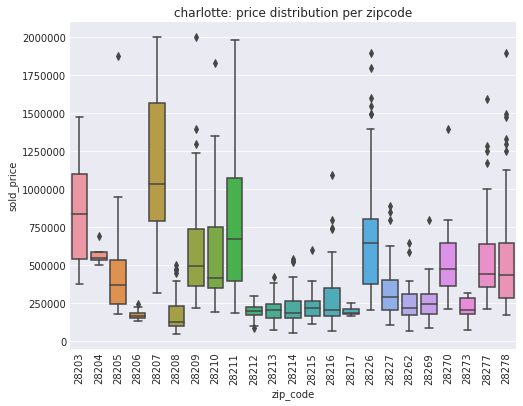

In [8]:
var = 'zip_code'
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='sold_price',data=df_train)
ax.set_title('charlotte: price distribution per zipcode')
plt.xticks(rotation=90)

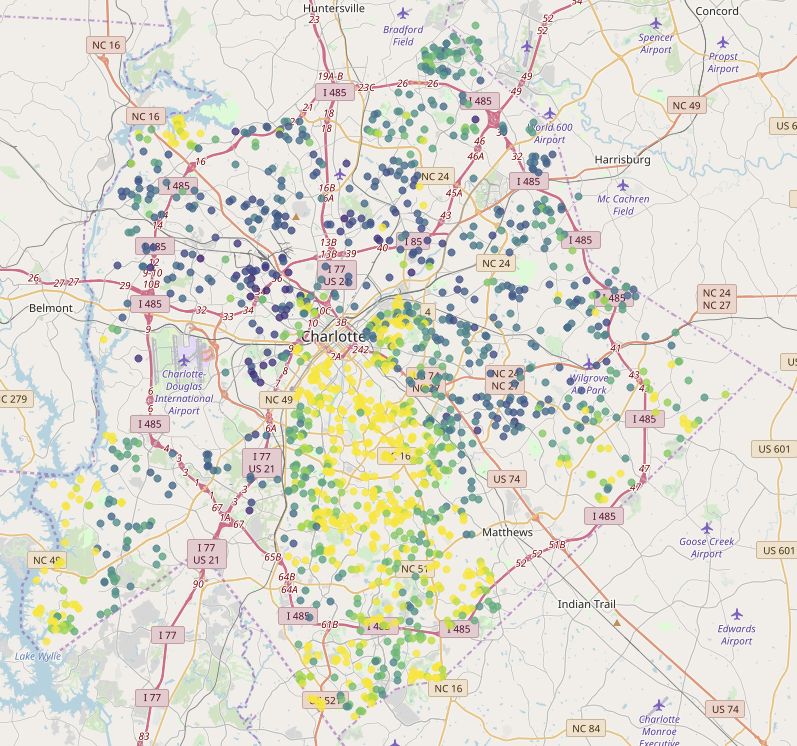

In [9]:
Image(filename='sale_price_map.png')

<b> Days on Market / Market Liquidity / Available Inventory</b>
* Feature to add
* Can create using existing data, just need some time for feature engineering
* Normalize last 30 days of listings/sales and use that as a feature

<b> Interior Features </b>
* Feature to add
* now: use domain experience / manually look at images
* two approaches
    * natural language processing (weeks)
    * image classification / object detection (months) 

<b> Other / Outliers / Unique properties </b>
* Need to be aware of hard to quantify improvements/changes of homes

<b> Modeling and *Preliminary* Results </b>

# FEATURES TO ADD:
 1. Year Sold (Dummy)
 2. Month Sold (Dummy)
 3. Neighborhood (Stop Using Zipcode, use Crime/School based Zipcode)
 4. Liquidity feature / Inventory feature / Days on Market Feature
 5. Interior features
 
 (Use https://www.kaggle.com/humananalog/xgboost-lasso for further feature engineering )


In [10]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
garage_size,457,0.37
month_sold,362,0.29
date_sold,362,0.29
year_sold,362,0.29
interior_features,269,0.22
flooring,108,0.09
subdivision,72,0.06
has_septic,14,0.01
has_well,14,0.01
has_pool,5,0.00


In [11]:
df_train = df_train[np.isfinite(df['building_area_sq_ft'])]


In [12]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)


,Total,Percent
garage_size,456,0.37
month_sold,361,0.29
date_sold,361,0.29
year_sold,361,0.29
interior_features,269,0.22
flooring,108,0.09
subdivision,71,0.06
has_septic,14,0.01
has_well,14,0.01
has_pool,5,0.00


In [13]:
df_train = df_train[pd.notnull(df_train['date_sold'])]
df_train = df_train.drop((missing_data[missing_data['Total'] > 0]).index,1)

In [14]:
#rechecking missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
no_pool_well_septic,0,0.00
sold_price,0,0.00
street_address_1,0,0.00
street_address_2,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
latitude,0,0.00
longitude,0,0.00
hc_slug,0,0.00


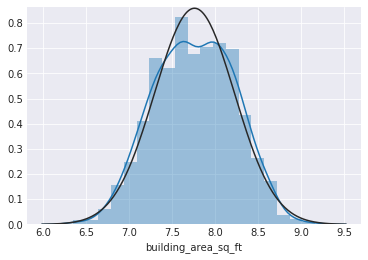

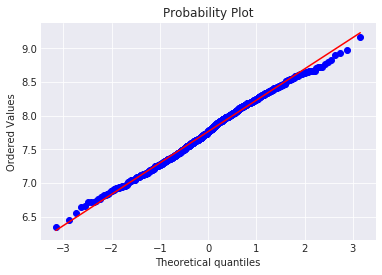

In [15]:
#applying log transformation
df_train['building_area_sq_ft'] = np.log(df_train['building_area_sq_ft'])
#transformed histogram and normal probability plot
sns.distplot(df_train['building_area_sq_ft'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['building_area_sq_ft'], plot=plt)

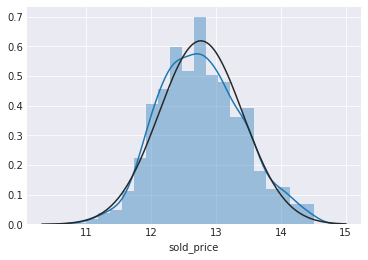

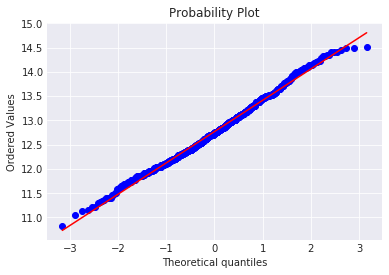

In [16]:

#applying log transformation
df_train['sold_price'] = np.log(df_train['sold_price'])
#transformed histogram and normal probability plot
sns.distplot(df_train['sold_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['sold_price'], plot=plt)


#Import libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train_small.values)
    rmse= np.sqrt(-cross_val_score(model, df_train_small.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#Define base models
#LASSO Regression
#NOTE This model may be very sensitive to outliers, to
#protect against this we use sklearn's Robustscaler method
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Elastic Net Regression
#Again using the same technique to make it robust to outliers
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#XGBoost 
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)



In [17]:
df_train_small = df_train[['zip_code','num_bedrooms','num_bathrooms','building_area_sq_ft']]

pd.get_dummies(df_train_small)

y_train = df_train['sold_price']


score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3502 (0.0157)



In [18]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.2614 (0.0113)



In [19]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.2507 (0.0148)



In [20]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.2501 (0.0169)



<b> Stacking/Ensembling</b>

# To do: create this into an ensemble (ensemble kalman filter)

In [21]:


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

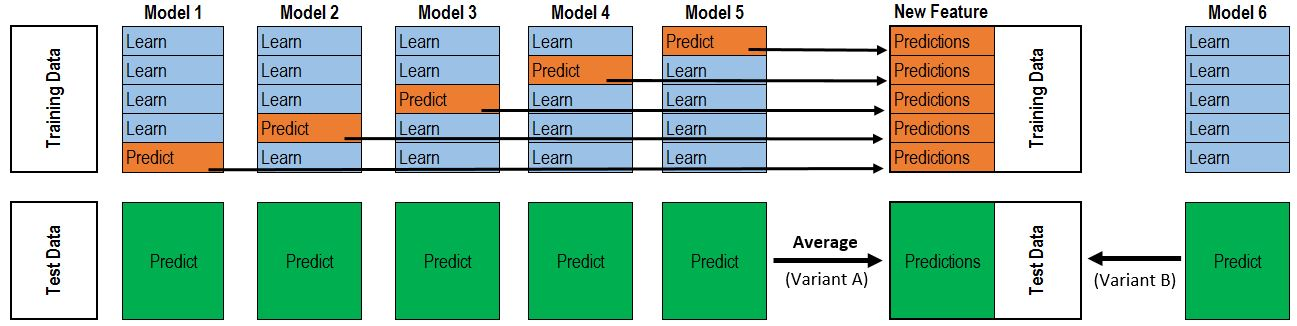

In [22]:
Image(filename='ensembling.jpg')

# Weighted Repeat Sales
   1. Pioneered by Case & Shiller (1987)
   2. Negative: Major assumption -  quality of house stays constant
        1. Need to account for / throw away damages/distressed/improvements
   3. Negative: Throws away data (only repeated sales count)
   4. Positive: Dont need to find 'value of a room'; just need to assume constant quality of home and solve for time
   5. Industry standard seems to be an ensemble of both hedonic and WRS methods
   6. Weight is time between sales (longer time => more uncertain => lower weight)

# Appraisal Risk

1. What could cause a low appraisal?
    1. Overbidding / Off market price / Desperate buyer / Model uncertainty
        * Risk managed by market value model
        * Indicator: Mkt value model
        * Indicator: Time on market (longer -> might be overvalued)
    2. Bad Comps (*Main risk IMO*)
        * What could lead to a bad comp?
        * "Other side of tracks"
        * Bad/Inexperienced appraiser
        * Extremely similar comps in diff neighborhoods
        * Poor market liquidity / Lack of sales

1. "Other side of tracks"
    1. Low-data: Relative scoring of distance of home to very different (in px per square foot) neighborhoods
    2. Medium+ data soln: Find correlation of 'other side of tracks' to relative appraisal px
2. Bad/Inexperienced appraiser
    1. Low data: use heuristics of who/when we get a low appraisal (either by appraiser(can we get this?) or by lender)
    2. Medium+ data soln: Find correlation of lender/appraiser to relative appraisal px
3. Extremely similar comps in diff neighborhoods
    1. Low-data: Relative scoring of number of available 'tempting' bad comps
    2. Medium+ data: Find correlation to relative appraisal px
4. Poor market liquidity / Lack of sales
    1. Low-data: Rank homes by number of available comps
    2. Medium+ data: Find correlation of liquidity to relative appraisal px

<b> Putting it together:</b>


0/Low data:
1. Get tight range of market values from market value ensemble
2. Bias maximum_bid px by relative low appraisal risk score


Medium+ data:
1. Generate both estimated low appraisal risk/costs and fair market value immediately 

<b> Data Collection</b>

1. Collect listing data and home sales data from remax
2. TO DO: Use cron to automate this
3. TO DO: Collect data from more than one broker site
    * Lowest hanging fruit here seems to be KW
4. Collect more image data

<b> Data products </b>
1. MLS Listing / Image Management
    * Easy to use listing/upload tool with photo tools
    * Can integrate the image ML into here so we can rate images as 'pretty' or 'ugly' e.g. so they take good pics
    * The end result is we get a bunch of nice image and listing data
2. Bid Mgmt tool
    * Help listing agents manage various bids
    * Get bid data and can help quantify the cash discount

<b> Risk Model </b>
1. Still need to work on how to best integrate the valuation with modeling
2. End goal: 
    * maximize risk adjusted revenue
    * fully understand relationship between bid aggressiveness, appraisal risk, net income from deals, and volatility of net income from deals